In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

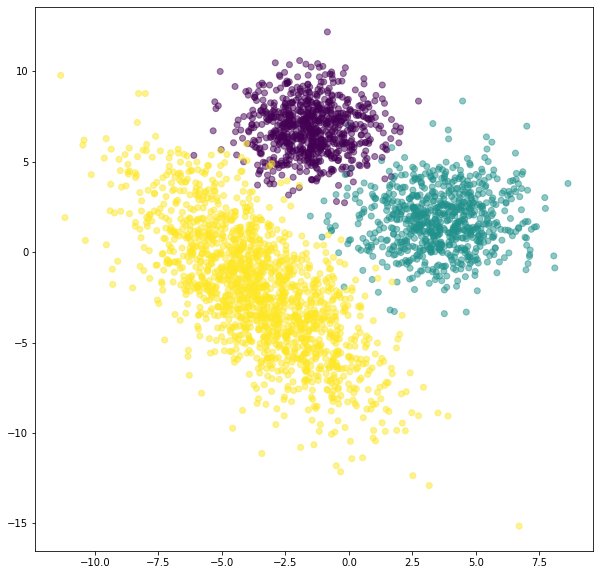

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means = KMeans(n_clusters = 3, random_state = 42)

In [ ]:
k_means.fit(X)

In [ ]:
centers = k_means.cluster_centers_

In [ ]:
elements = k_means.labels_

In [ ]:
import numpy as np
print(np.round(centers).astype(np.int))

In [ ]:
_, counts = np.unique(elements, return_counts = True)
for count in counts:
    print(count, end = ' ')

In [ ]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
stud = pd.read_csv('snsdata.csv')

In [ ]:
stud.head()

In [ ]:
stud.info()

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [ ]:
stud = stud.drop(['gradyear', 'gender', 'age', 'friends'], axis = 1)

In [ ]:
len(stud.columns)

In [ ]:
X = stud

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

In [ ]:
k_means = KMeans(n_clusters = 9, random_state = 123)
k_means.fit(X_std)

Укажите номер кластера, в который попало меньше всего учеников.

In [ ]:
k_means_pred = k_means.labels_
_, counts = np.unique(k_means_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

In [ ]:
print('Номер кластера, в который попало меньше всего учеников: ', counts.argmin())

В один из кластеров попали ученики с интересами music, god, dance, hair, shopping, cute, band, rock, football, church. Сколько всего учеников попали в этот кластер?

In [ ]:
X['cluster_label'] = k_means.labels_

In [ ]:
X.head()

In [ ]:
find_cluster = []
set_of_interests = set(['music', 'god', 'dance', 'hair', 'shopping', 
                        'cute', 'band', 'rock', 'football', 'church'])
for k, group in X.groupby('cluster_label'):
    #print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)
    if set(top_words.index) == set_of_interests:
        find_cluster.append(k)

print('Кластеры подходящие условию задачи: ', find_cluster)
print('Кол-во учеников с интересами по условию задачи:', np.sum([counts[ind] for ind in find_cluster]))

In [ ]:
len(k_means.cluster_centers_)

In [ ]:
group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)

In [ ]:
A = X.groupby('cluster_label').mean()

In [ ]:
display(A)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()

In [ ]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
gm.fit(X)

In [ ]:
y_pred = gm.predict(X)

In [ ]:
# Совмещаем обучение модели и предсказание значений
# y_pred = gm.fit_predict(X)

In [ ]:
means = gm.means_

In [ ]:
means

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:


In [ ]:
gm = GaussianMixture(n_components = 3, random_state = 42)

In [ ]:
y_pred = gm.fit_predict(X)

In [ ]:
print(np.round(gm.means_).astype(np.int))

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [ ]:
# Assign a label to each sample 
labels = gm.predict(X) 
a = [labels]
_, counts = np.unique(a, return_counts = True)
for count in counts:
    print(count, end = ' ')

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [ ]:
stud = pd.read_csv('snsdata.csv')
stud = stud.drop(['gradyear', 'gender', 'age', 'friends'], axis = 1)
X = stud
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

In [ ]:
gm_stud = GaussianMixture(n_components = 9, random_state = 123)

In [ ]:
y_pred_stud = gm_stud.fit_predict(X_std)

In [ ]:
labels = gm_stud.predict(X_std) 
a = [labels]
_, counts = np.unique(a, return_counts = True)
for count in counts:
    print(count, end = ' ')

In [ ]:
display(labels[:20])

In [ ]:
gm_stud.n_iter_

## Агломеративная кластеризация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

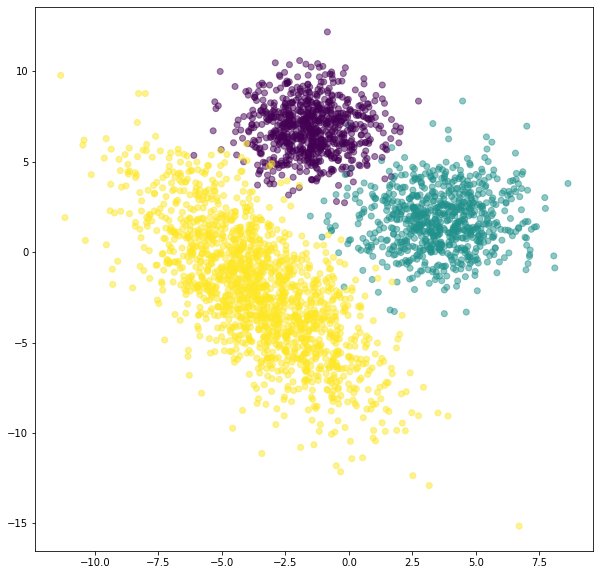

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()
ac.fit(X)

AgglomerativeClustering()

In [5]:
ac.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [7]:
ac.n_leaves_

3000

In [8]:
import numpy as np
a = [ac.labels_]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

In [9]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors = 6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [10]:
ac = AgglomerativeClustering(n_clusters = 3, connectivity = connectivity)

In [11]:
ac.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [12]:
import numpy as np
a = [ac.labels_]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

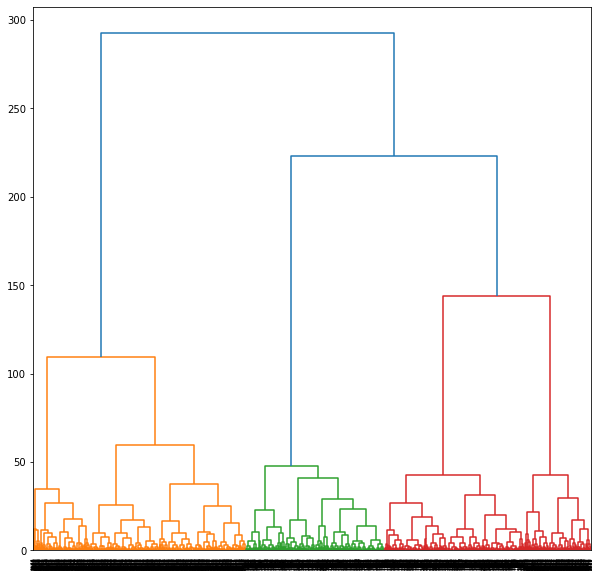

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, p = 150, leaf_rotation = 90.)

In [14]:
import pandas as pd

In [15]:
food = pd.read_csv('food.csv', sep = ' ')

In [16]:
food

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


In [17]:
X = food.drop('Name', axis = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

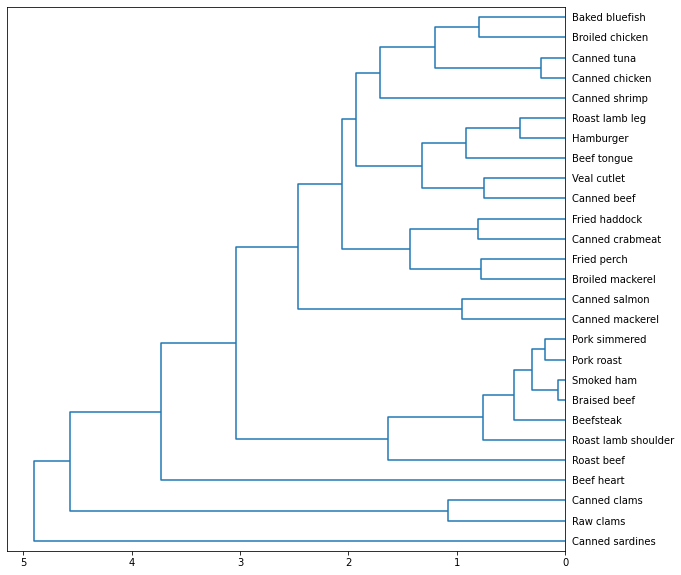

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, method='average', metric='euclidean')
names = food.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [20]:
Z.shape[0] + 1

27

In [21]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

In [22]:
import numpy as np
a = [labels]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

2 7 2 14 1 1 

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [23]:
ind_calc_150_160 = food[(food.Calcium >= 150) & (food.Calcium <= 160)].index
labels[ind_calc_150_160]

array([3, 3], dtype=int32)

Введите номер кластера, в который попал продукт с максимальной жирностью.

In [24]:
ind_max_fat = food.Fat.idxmax()
labels[ind_max_fat]

2

In [25]:
food[(food.Calcium >= 150) & (food.Calcium <= 160)].index

Int64Index([21, 23], dtype='int64')

In [26]:
print(labels)

[2 4 2 2 4 4 4 5 4 2 2 2 2 4 4 4 1 1 4 4 4 3 4 3 6 4 4]


# DBSCAN

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [29]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

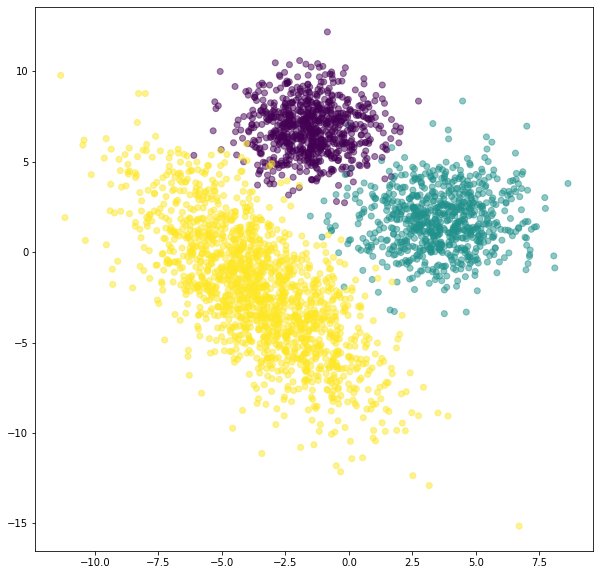

In [31]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [32]:
dbscan = DBSCAN(eps = 0.9, min_samples = 35)

In [33]:
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [37]:
labels = dbscan.labels_

In [39]:
import numpy as np
a = [labels]
counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

[-1  0  1  2] [ 368  656  721 1255] 

In [41]:
dbscan = DBSCAN(eps = 0.8, min_samples = 35)

In [42]:
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

In [44]:
labels1 = dbscan.labels_

In [45]:
import numpy as np
a = [labels1]
counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

[-1  0  1  2] [ 583  603  681 1133] 

# Коэффициент силуэта

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [49]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, random_state = 42)

In [50]:
# Совмещаем обучение модели и предсказание значений
y_pred = gm.fit_predict(X)

In [51]:
from sklearn.metrics import silhouette_score
silhouette_score(X = X, labels = y_pred, metric = 'euclidean')

0.3988405457243407

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

K-means — n_clusters=3, random_state=42
EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
Агломеративная кластеризация – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [52]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [53]:
k_means_pred = k_means.labels_

In [54]:
silhouette_score(X = X, labels = k_means_pred, metric = 'euclidean')

0.5131660482634046

In [55]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [56]:
silhouette_score(X = X, labels = ac.labels_, metric = 'euclidean')

0.4811992210663849

In [60]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.9, min_samples = 35)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [61]:
silhouette_score(X = X, labels = dbscan.labels_, metric = 'euclidean')

0.4454335539277996

Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [63]:
clusters = [i for i in range(2,11)]

In [65]:
for i in clusters:
    k_means = KMeans(n_clusters = i, random_state = 42)
    k_means.fit(X)
    k_means_pred = k_means.labels_
    print(silhouette_score(X = X, labels = k_means_pred, metric = 'euclidean'))

0.45525850917271177
0.5131660482634046
0.5114118014309094
0.48208278531968773
0.46004229886156645
0.39789335922616964
0.33357737485627553
0.3279588779748603
0.3215688946087787


In [66]:
for i in clusters:
    gm = GaussianMixture(n_components = i, random_state = 42)
    y_pred = gm.fit_predict(X)
    print(silhouette_score(X = X, labels = y_pred, metric = 'euclidean'))

0.45506572865005773
0.3988405457243407
0.510655066343949
0.4813621459449205
0.4628181210461304
0.397854908720611
0.32999199343917063
0.3130377197653585
0.2972718044706393


In [68]:
for i in clusters:
    ac = AgglomerativeClustering(n_clusters = i)
    ac.fit(X)
    print(silhouette_score(X = X, labels = ac.labels_, metric = 'euclidean'))

0.40560374862968174
0.4811992210663849
0.48470679039805054
0.4732978942735451
0.4360547281175275
0.3610107002721555
0.3470279907723165
0.27831000812401474
0.281314682459535


# Однородность

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

k-means — n_clusters=3, random_state=42
GaussianMixture — n_components=3, random_state=42
AgglomerativeClustering — n_clusters=3
DBSCAN — eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [69]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

In [70]:
X_std = StandardScaler().fit_transform(X)

In [71]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X_std)

KMeans(n_clusters=3, random_state=42)

In [72]:
k_means_pred = k_means.labels_

In [73]:
# теперь посчитаем однородность
homogeneity_score(labels_true = y, labels_pred = k_means_pred)

0.804474693112785

In [74]:
gm = GaussianMixture(n_components = 3, random_state = 42)
y_pred = gm.fit_predict(X_std)

In [76]:
# теперь посчитаем однородность
homogeneity_score(labels_true = y, labels_pred = y_pred)

0.9339791347507893

In [77]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X_std)

AgglomerativeClustering(n_clusters=3)

In [78]:
# теперь посчитаем однородность
homogeneity_score(labels_true = y, labels_pred = ac.labels_)

0.9099781767383747

In [79]:
dbscan = DBSCAN(eps = 0.9, min_samples = 35)
dbscan.fit(X_std)

DBSCAN(eps=0.9, min_samples=35)

In [80]:
# теперь посчитаем однородность
homogeneity_score(labels_true = y, labels_pred = dbscan.labels_)

0.00044465831964150197

# Полнота

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [82]:
from sklearn.metrics.cluster import completeness_score
# теперь посчитаем полноту
completeness_score(labels_true = y, labels_pred = y_pred)

0.9325740421656737

In [83]:
completeness_score(labels_true = y, labels_pred = k_means_pred)

0.7828224102025245

In [84]:
completeness_score(labels_true = y, labels_pred = ac.labels_)

0.9058386997451113

In [85]:
completeness_score(labels_true = y, labels_pred = dbscan.labels_)

0.08342237034907717

# V-мера

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [86]:
from sklearn.metrics.cluster import v_measure_score
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = y_pred)

0.9332760595996924

In [87]:
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = k_means_pred)

0.793500872513578

In [88]:
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac.labels_)

0.9079037199053294

In [89]:
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = dbscan.labels_)

0.000884601531943088

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

n_clusters=3, init='k-means++', n_init=1, random_state=42
n_clusters=3, init='random', n_init=1, random_state=42
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [95]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', n_init = 1, random_state = 42)
k_means.fit(X_std)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [96]:
k_means_pred = k_means.labels_

In [97]:
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = k_means_pred)

0.7892280957870129

In [102]:
k_means1 = KMeans(n_clusters = 3, init = 'random', n_init = 1, random_state = 42)
k_means1.fit(X_std)
k_means_pred1 = k_means1.labels_

# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = k_means_pred1)

0.7892280957870129

Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

k-means с параметрами n_clusters=3, n_init=1, random_state=42
MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42
В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [110]:
k_means = KMeans(n_clusters = 3, n_init = 1, random_state = 42)
k_means.fit(X_std)
k_means_pred = k_means.labels_
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = k_means_pred)

0.7892280957870129

In [108]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters = 3, n_init = 1, random_state = 42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = kmeans_mini_batch_pred)

0.7802036540872134

Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

с параметром n_clusters=3
с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета

In [112]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X_std)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac.labels_)

0.9079037199053294

In [113]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors = 6, include_self = False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [115]:
ac1 = AgglomerativeClustering(n_clusters = 3, connectivity = connectivity)
ac1.fit(X)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac1.labels_)

0.902634398342219

Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или min_samples может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

с параметрами eps=0.9, min_samples=35
с параметрами eps=0.8, min_samples=35
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [123]:
dbscan = DBSCAN(eps = 0.9, min_samples = 35)
dbscan.fit_predict(X)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = dbscan.labels_)

0.7732549110297919

In [124]:
dbscan1 = DBSCAN(eps = 0.8, min_samples = 35)
dbscan1.fit_predict(X)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = dbscan1.labels_)

0.7063100442576922

Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [127]:
dbscan = DBSCAN(eps = 0.9, min_samples = 35)
labels = dbscan.fit_predict(X)
not_noise_ind = np.where(labels != -1)
v_measure = v_measure_score(y[not_noise_ind], labels[not_noise_ind])
np.round(v_measure, 2)

0.97

В курсе мы рассмотрели две метода нормализации данных:

MinMax нормализация — приведение данных к масштабу между  и .
Стандартная нормализация — данные имеют среднее  и стандартное отклонение .
Проверим, влияет ли предобработка данных на результат кластеризации. Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

на признаках исходного датасета,
предварительно трансформируйте признаки при помощи стандартной нормализации.
Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [128]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(X)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac.labels_)

0.703747024360433

In [129]:
ac1 = AgglomerativeClustering(n_clusters = 3)
ac1.fit(X_std)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac1.labels_)

0.9079037199053294

Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

на признаках исходного датасета,
предварительно трансформируйте признаки при помощи MinMax нормализации.
Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [131]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

ac2 = AgglomerativeClustering(n_clusters = 3)
ac2.fit(X_minmax)
# теперь посчитаем полноту
v_measure_score(labels_true = y, labels_pred = ac2.labels_)

0.8929241488344335

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [135]:
linkage = ['ward', 'complete', 'average', 'single']
for i in linkage:
    ac = AgglomerativeClustering(n_clusters = 3, linkage = i)
    ac.fit(X_std)
    # теперь посчитаем полноту
    print(v_measure_score(labels_true = y, labels_pred = ac.labels_))

0.9079037199053294
0.5805530251504777
0.678656551579543
0.0008842106330108959
